In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.drop('User ID', axis = 1, inplace = True)

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


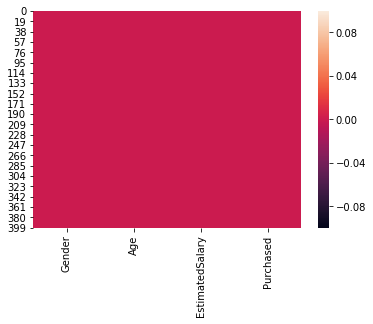

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [10]:
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [11]:
df.drop('Gender', axis =1, inplace=True)

In [12]:
df = pd.concat([gender, df], axis=1)

In [13]:
df.head()

,Male,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


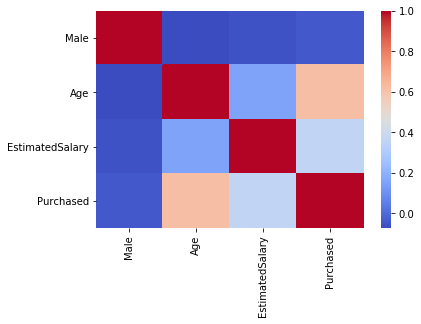

In [16]:
sns.heatmap(df.corr(), cmap = 'coolwarm')

In [17]:
df.drop('Male', axis =1, inplace=True)

In [24]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [25]:
df.mean()

Age                   37.6550
EstimatedSalary    69742.5000
Purchased              0.3575
dtype: float64

In [27]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df.drop('Purchased', axis =1))
scaled_array = ss.transform(df.drop('Purchased', axis =1))

/home/raghav/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [32]:
X  = pd.DataFrame(data = scaled_array, columns = df.columns[:-1])
Y = df['Purchased']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [37]:
X_train['Target']  = y_train

/home/raghav/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280 entries, 40 to 112
Data columns (total 3 columns):
Age                280 non-null float64
EstimatedSalary    280 non-null float64
Target             280 non-null int64
dtypes: float64(2), int64(1)
memory usage: 8.8 KB


In [40]:
X_train.to_csv('train.csv')

In [34]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

/home/raghav/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
ypred = classifier.predict(X_test)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred)

array([[72,  6],
       [ 7, 35]])